# Cursos de Series de tiempo con *Machine Learning*
## Modulo . Análisis multivariado con modelo Arima
                        Elaborado por: Naren Castellon

# **Table of Contents** 


1.	[Introducción](#1)
2.	[Definition of the Arima model](#2)
3.	[Advantages of using AutoArima](#3)
4.	[Caso de estudio](#4)
5.	[Loading libraries and data](#5)
6.	[Explore Data with the plot method](#6)
7.	[Split the data into training and testing](#7)
8.	[Implementation of AutoArima with StatsForecast](#8)
9.	[Evaluate the model’s performance](#9)
10.	[Evaluate the model](#10)
11. [References](#11)

# Introducción

El modelo ARIMA (Autoregressive Integrated Moving Average) es una herramienta estadística ampliamente utilizada en el análisis de series temporales para predecir y analizar patrones en datos secuenciales. En el contexto del retail, el modelo ARIMA se aplica para comprender y pronosticar las tendencias de ventas, demanda de productos y otros factores relevantes para la industria minorista.

El modelo ARIMA combina tres componentes principales: la parte autoregresiva (AR), la parte de media móvil (MA) y la parte de integración (I). La parte autoregresiva considera la dependencia de los valores pasados en la serie temporal para predecir los valores futuros. La parte de media móvil tiene en cuenta la relación entre los errores pasados y los valores observados de la serie temporal. La parte de integración se utiliza cuando es necesario diferenciar la serie temporal para hacerla estacionaria, es decir, eliminar las tendencias y patrones no estacionarios.

En el contexto del retail, el modelo ARIMA se utiliza para analizar y pronosticar las ventas o la demanda de productos. Esto permite a los minoristas tomar decisiones informadas sobre: 
1. La gestión de inventarios, 
2. La planificación de la producción y 
3. La optimización de la cadena de suministro. 

Al comprender las tendencias y patrones pasados de las series temporales, el modelo ARIMA proporciona una base sólida para predecir con precisión las ventas futuras y ajustar las estrategias comerciales en consecuencia.

Además, el modelo ARIMA también puede utilizarse para identificar estacionalidad en las ventas minoristas, como patrones de compra durante las festividades o eventos especiales. Esto permite a los minoristas anticiparse a las fluctuaciones estacionales y adaptar su inventario y promociones en consecuencia.

En resumen, el modelo ARIMA es una herramienta valiosa en el análisis de series temporales para la industria minorista. Permite a los minoristas comprender y pronosticar patrones de ventas, demanda de productos y estacionalidad, lo que proporciona una ventaja competitiva al tomar decisiones basadas en datos y ajustar las estrategias comerciales para maximizar la eficiencia y rentabilidad en el sector minorista.

# Definición del Modelo

Un proceso del modelo Arima (media móvil integrada autorregresiva) es la combinación de un proceso autorregresivo AR(p), integración I(d) y el proceso de media móvil MA(q).

Al igual que el proceso ARMA, el proceso ARIMA establece que el valor presente depende de los valores pasados, provenientes de la porción AR(p), y de los errores pasados, provenientes de la porción MA(q). Sin embargo, en lugar de utilizar la serie original, denominada yt,
el proceso ARIMA utiliza la serie diferenciada, denotada como $y'_{t}$. Tenga en cuenta que $y'_{t}$ puede representar una serie que se ha diferenciado más de una vez.

Por lo tanto, la expresión matemática del proceso ARIMA(p,d,q) establece que el valor presente de la serie diferenciada $y'_{t}$ es igual a la suma de una constante $C$, valores pasados de la serie diferenciada serie $\phi_{p}y'_{t-p}$, la media de la serie diferenciada $\mu$, términos de error pasados $\theta_{q}\varepsilon_{t-q}$ y un término de error actual $\varepsilon_ {t}$, como se muestra en la ecuación

\begin{equation}
  y'_{t} = c + \phi_{1}y'_{t-1} + \cdots + \phi_{p}y'_{t-p}
     + \theta_{1}\varepsilon_{t-1} + \cdots + \theta_{q}\varepsilon_{t-q} + \varepsilon_{t},  \tag{1}
\end{equation}

donde $y'_{t}$ es la serie diferenciada (puede haber sido diferenciada más de una vez). Los "predictores" del lado derecho incluyen valores rezagados de $y_{t}$ y errores rezagados. A esto lo llamamos modelo **ARIMA( p,d,q)**, donde

|  |  |
|-|-------------------------|
|p|order of the autoregressive part|
|d|degree of first differencing involved|
|q|order of the moving average part|

Las mismas condiciones de estacionariedad e invertibilidad que se utilizan para los modelos autorregresivos y de media móvil también se aplican a un modelo ARIMA.

Una vez que empezamos a combinar componentes de esta manera para formar modelos más complicados, es mucho más fácil trabajar con la notación de retroceso. Por ejemplo, la ecuación (1) se puede escribir en notación de retroceso como:

\begin{equation}
\tag{2}
  \begin{array}{c c c c}
    (1-\phi_1B - \cdots - \phi_p B^p) & (1-B)^d y_{t} &= &c + (1 + \theta_1 B + \cdots + \theta_q B^q)\varepsilon_t\\
    {\uparrow} & {\uparrow} & &{\uparrow}\\
    \text{AR($p$)} & \text{$d$ differences} & & \text{MA($q$)}\\
  \end{array}
\end{equation}

Seleccionar valores apropiados para p, d y q puede resultar difícil. Sin embargo, la función `AutoARIMA()` de `statsforecast` lo hará automáticamente.

Para más información [here]("https://otexts.com/fpp3/non-seasonal-arima.html")

# Caso de Estudio: Forecasting de ventas en tienda minorista 

Introducción:
Una tienda minorista desea mejorar su capacidad para pronosticar las ventas de sus productos con el fin de optimizar la gestión de inventario y las estrategias de ventas. El objetivo es predecir con precisión las ventas futuras en función de factores históricos y estacionales, lo que permitirá a la tienda tomar decisiones informadas sobre la planificación de la producción, las promociones y las compras de inventario.

Datos disponibles:
La tienda ha recopilado datos históricos de ventas de sus productos durante los últimos cinco años. Los datos incluyen información sobre las fechas de venta, el tipo de producto, los precios, las promociones y otros factores relevantes. 

Objetivos:
1. Desarrollar un modelo de pronóstico preciso para predecir las ventas futuras en función de los datos históricos y estacionales.

2. Identificar patrones y tendencias en los datos históricos de ventas para comprender mejor los factores que influyen en las ventas minoristas.

3. Evaluar la efectividad del modelo de pronóstico y comparar diferentes enfoques para mejorar la precisión de las predicciones.

Metodología:

1. Análisis exploratorio de datos:
   - Explorar y visualizar los datos históricos de ventas para identificar patrones estacionales, tendencias y posibles relaciones con otros factores, como promociones o precios.
   - Realizar análisis de correlación para determinar la influencia de diferentes variables en las ventas.

2. Preprocesamiento de datos:
   - Realizar la limpieza de datos, tratando los valores faltantes o atípicos, y estandarizar los datos si es necesario.
   - Realizar la descomposición de series temporales para identificar componentes de tendencia, estacionalidad y residuos.

3. Selección y ajuste del modelo:
   - Evaluar diferentes modelos, como ARIMA, SARIMA (ARIMA estacional), modelos de suavizado exponencial o modelos de regresión, para encontrar el más adecuado para el conjunto de datos.
   - Ajustar los parámetros del modelo seleccionado utilizando técnicas de validación cruzada y métricas de evaluación, como el error cuadrático medio (RMSE) o el error absoluto medio (MAE).

4. Validación del modelo:
   - Dividir los datos en conjuntos de entrenamiento y prueba.
   - Evaluar la precisión del modelo pronosticando las ventas en el conjunto de prueba y comparando los resultados reales con las predicciones.

5. Mejora del modelo:
   - Realizar ajustes y refinamientos adicionales en el modelo, como la inclusión de variables adicionales o la optimización de los hiperparámetros, para mejorar la precisión del pronóstico.

6. Pronóstico y análisis:
   - Utilizar el modelo final para generar pronósticos de ventas futuras.
   - Evaluar y analizar los resultados del pronóstico para identificar patrones estacionales, tendencias o cambios en la demanda que puedan ser útiles para la gestión de inventario y las estrategias de ventas.

Conclusiones:
El desarrollo y la implementación de un modelo preciso de pronóstico de ventas en el contexto minorista permitirá a la tienda mejorar su capacidad para tomar decisiones informadas sobre la gestión de inventario, las promociones y las estrategias de ventas. Al comprender los patrones y las tendencias en los datos históricos, la tienda podrá anticiparse a las fluctuaciones estacionales y adaptar su inventario y promociones en consecuencia, maximizando así la eficiencia y la rentabilidad. Además, el monitoreo regular y la evaluación continua del modelo permitirán ajustes y refinamientos adicionales para mejorar aún más la precisión del pronóstico.

## Cargamos las librerias

In [1]:
import pandas as pd
import numpy as np # for linear algebra
import math # for math operations 

import seaborn as sns # for plotting


# data preprocessing
from sklearn.preprocessing import LabelEncoder


# visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import patches
import matplotlib.pyplot as plt # for plotting
import squarify # for tree maps

In [2]:
# Mlforecast
# ==============================================================================
from mlforecast import MLForecast
from window_ops.expanding import expanding_mean
from window_ops.rolling import rolling_mean
from window_ops.ewm import ewm_mean
from mlforecast.target_transforms import Differences

from mlforecast.utils import PredictionIntervals
from utilsforecast.plotting import plot_series
from utilsforecast.preprocessing import fill_gaps

### Cargamos los Datos

In [3]:
df = pd.read_excel("./data/Sales_minorista_retail.xlsx")

df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
df.drop_duplicates(inplace=True)

In [5]:
# Explore Categorical Columns

# Select categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category'])

# Create a DataFrame from categorical columns with their unique values
cat_feature_info = pd.DataFrame(columns=['Feature', 'Unique_Values', 'Num_Unique_Values'])
for cat_feat in categorical_columns:
    unique_values = df[cat_feat].unique()
    num_unique_values = len(unique_values)  # Number of unique values
    cat_feature_info = pd.concat([cat_feature_info, 
                                  pd.DataFrame({'Feature': cat_feat, 
                                                'Unique_Values': [unique_values],
                                                'Num_Unique_Values': [num_unique_values]})], 
                                 ignore_index=True)

display(cat_feature_info)

,Feature,Unique_Values,Num_Unique_Values
0,Order ID,"[CA-2017-152156, CA-2017-138688, US-2016-10896...",4916
1,Order Date,"[08/11/2017, 12/06/2017, 11/10/2016, 09/06/201...",1229
2,Ship Date,"[11/11/2017, 16/06/2017, 18/10/2016, 14/06/201...",1326
3,Ship Mode,"[Second Class, Standard Class, First Class, Sa...",4
4,Customer ID,"[CG-12520, DV-13045, SO-20335, BH-11710, AA-10...",793
5,Customer Name,"[Claire Gute, Darrin Van Huff, Sean O'Donnell,...",793
6,Segment,"[Consumer, Corporate, Home Office]",3
7,Country,[United States],1
8,City,"[Henderson, Los Angeles, Fort Lauderdale, Conc...",529
9,State,"[Kentucky, California, Florida, North Carolina...",48


## Análisis Exploratorio de Datos

In [ ]:
target = 'Profit'
# Visualize Categorical Columns ( Pie Chart )
categorical_features = categorical_columns.drop(['Country', 'City', 'State', 'Sub-Category'], axis=1).columns.tolist()
def autopct_fun(abs_values):
    gen = iter(abs_values)
    return lambda pct: f"{pct:.1f}%\n({next(gen)})"

yes_color = '#FF6666'  
no_color = '#6699FF'  

if target in categorical_features:
    categorical_features.insert(0, categorical_features.pop(categorical_features.index(target)))

fig, ax = plt.subplots(nrows=(len(categorical_features) // 2) + 1, ncols=2, figsize=(20, 40))
ax = ax.flat

for i, cat_feat in enumerate(categorical_features):
    df_class = df[cat_feat].value_counts()
    labels = df_class.index.tolist()
    values = df_class.values.tolist()
    unique_labels = len(labels)  
    colors = [yes_color if label == 'Yes' else no_color if label == 'No' else plt.cm.tab20(j % 20) for j, label in enumerate(labels)]
    
    legend_elements = [patches.Patch(color=colors[j], label=labels[j]) for j in range(len(labels))]
    legend_elements = sorted(legend_elements, key=lambda x: labels[legend_elements.index(x)] != 'Yes', reverse=True)

    ax[i].pie(values, labels=labels, autopct=autopct_fun(values), shadow=True, startangle=90,
              colors=colors, textprops={'fontsize': 12})
    ax[i].set_title(f"{cat_feat}{' (target)' if cat_feat == target else ''}", fontsize=15, fontweight="bold")
    ax[i].axis('equal')
    ax[i].legend(handles=legend_elements, loc='best')

for j in range(i + 1, len(ax)):
    ax[j].set_visible(False)

plt.subplots_adjust(left=0.1, right=0.9, top=0.5, bottom=0.1, hspace=0.3, wspace=0.3)
plt.show()

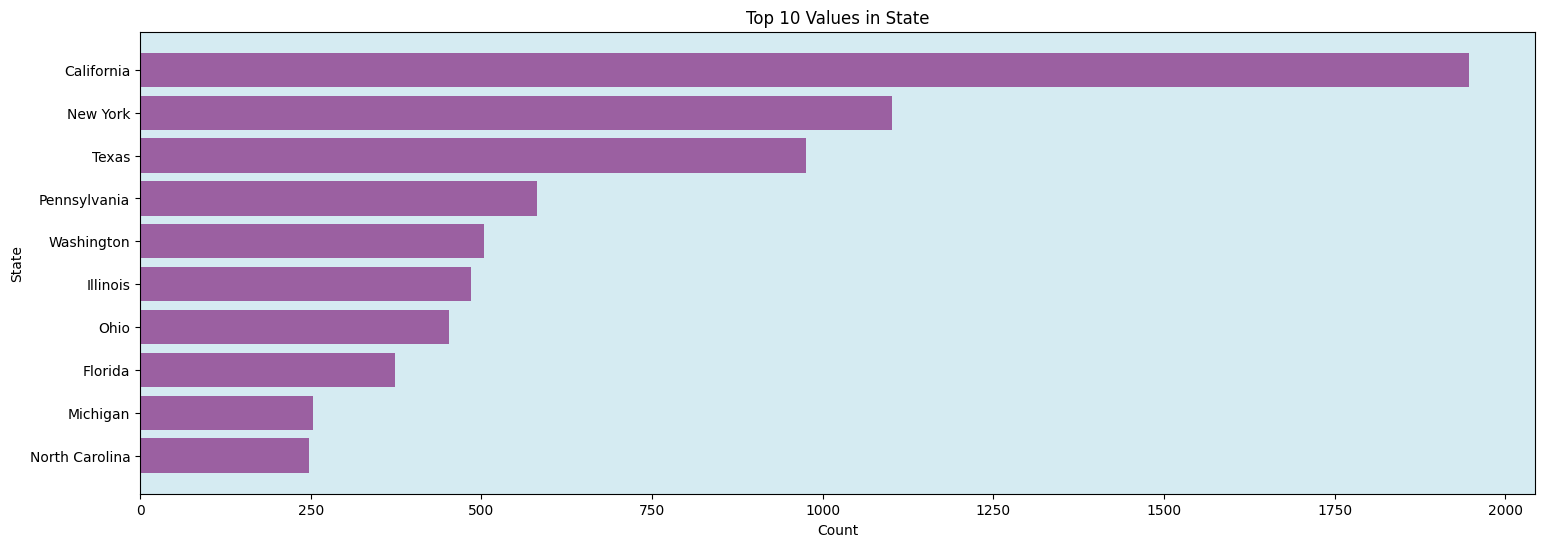

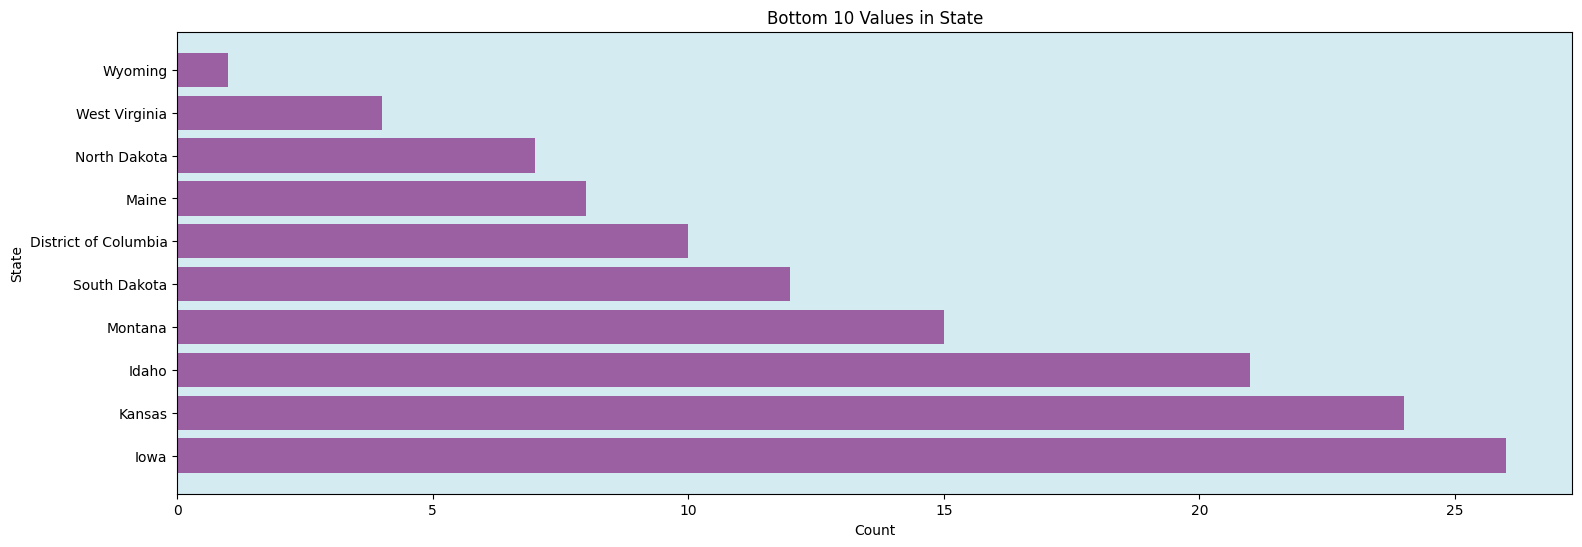

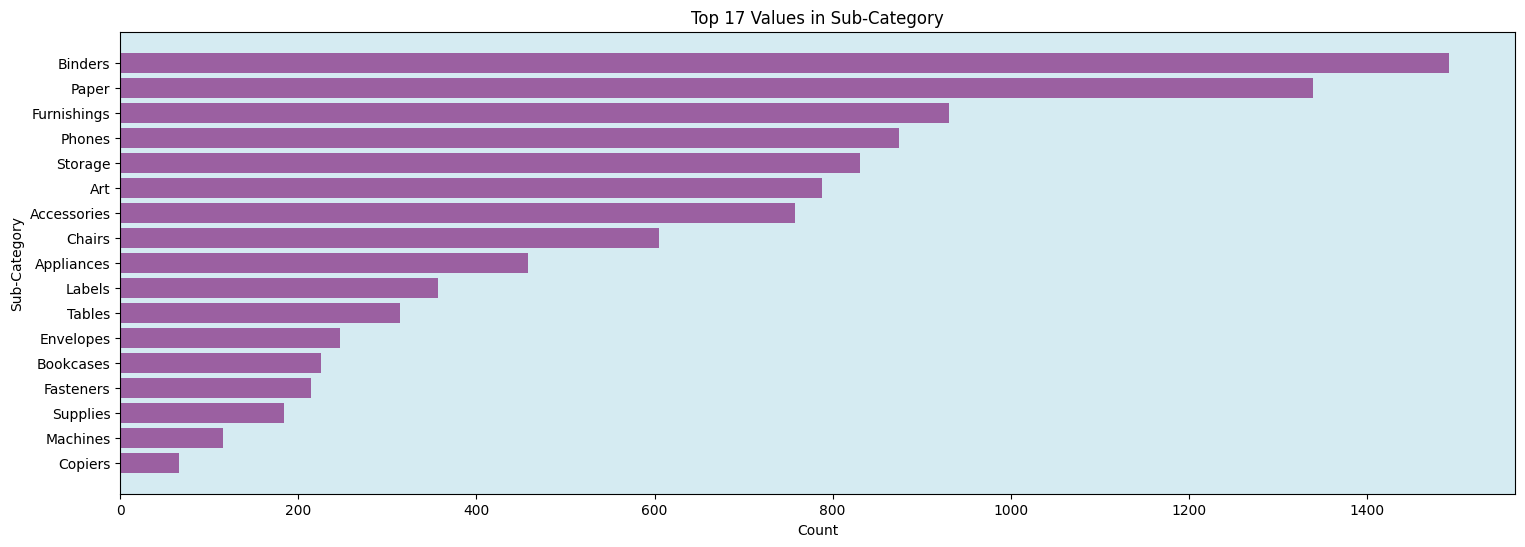

In [6]:
def bar_plot_top_bottom_values(data, column, top=True, top_n=10, ascending=False, orientation='horizontal'):
    """
    Visualizes the most frequent values and their counts in a given column using a bar chart.

    Args:
    data (DataFrame): The dataset to be processed.
    column (str): The name of the column to be used in the chart.
    top_n (int, optional): The number of top values to display. Defaults to 10.
    ascending (bool, optional): Whether to reverse the order of the data. Defaults to False.
    orientation (str, optional): The orientation of the bar chart 'horizontal' or 'vertical'. Defaults to 'horizontal'.
    """
    plt.figure(figsize=(18, 6))
    
    # Decide whether to show top or bottom values
    if top:
        top_values = data[column].value_counts().nlargest(top_n)
    else:
        top_values = data[column].value_counts().nsmallest(top_n)
    
    if orientation == 'horizontal':
        plt.barh(top_values.index.astype(str), top_values.values, color='#9B60A1')
        plt.xlabel('Count')
        plt.ylabel(column)
        plt.gca().invert_yaxis()  # Sort the bars from highest to lowest value if horizontal
    elif orientation == 'vertical':
        plt.bar(top_values.index.astype(str), top_values.values, color='#9B60A1')
        plt.xlabel(column)
        plt.ylabel('Count')
        
    # Background color
    plt.gca().set_facecolor((173/255, 216/255, 230/255, 0.5))
    
    # Set title
    plt.title(f'{"Top" if top else "Bottom"} {top_n} Values in {column}')
    
    # Show
    plt.show()
bar_plot_top_bottom_values(df, 'State', top=True, top_n=10)
bar_plot_top_bottom_values(df, 'State', top=False, top_n=10)
bar_plot_top_bottom_values(df, 'Sub-Category', top=True, top_n=17)

El primer gráfico muestra los estados con los mayores volúmenes de ventas, lo que indica una fuerte presencia de mercado en California, Nueva York y Texas. La importante ventaja de California sugiere que es un actor clave en el panorama minorista, posiblemente debido a su gran población y tamaño económico. Estos datos pueden guiar estrategias de expansión y marketing específicas, centrándose en los estados más lucrativos.

El segundo gráfico, por el contrario, destaca los estados con las ventas más bajas, incluidos Wyoming, Virginia Occidental y Dakota del Norte. Las ventas limitadas en estas áreas podrían reflejar mercados más pequeños o una menor actividad minorista. Comprender las razones detrás del bajo desempeño en estos estados podría descubrir oportunidades de crecimiento o revelar desafíos específicos de estos mercados.

Según el tercer gráfico, la distribución de las ventas entre subcategorías revela que Carpetas, Papel y Mobiliario lideran el volumen de ventas. Esta información sobre la popularidad del producto puede informar las decisiones de inventario, el enfoque de marketing y el desarrollo de productos. Las altas ventas de Carpetas y Papel sugieren que los suministros de oficina siguen siendo una demanda básica entre los consumidores.

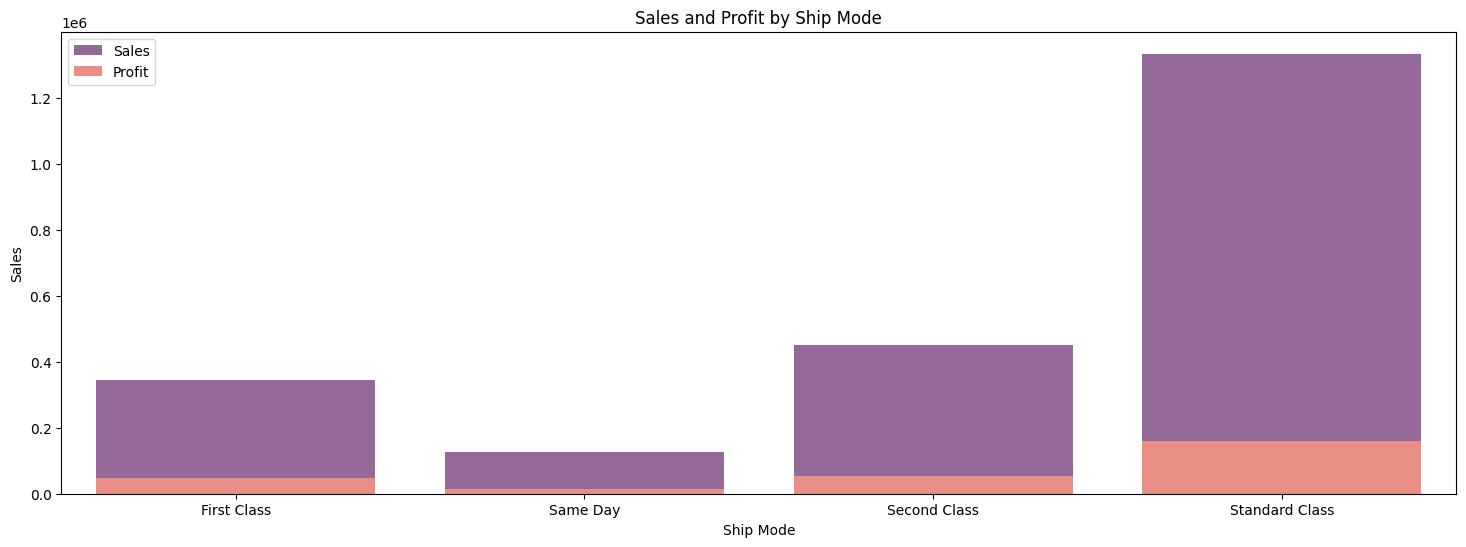

In [7]:

#Group sales and profit by shipping modes
ship_mode_analysis = df.groupby('Ship Mode').agg({'Sales':'sum', 'Profit':'sum'}).reset_index()

#Visualize sales and profit with a bar chart
plt.figure(figsize=(18, 6))
sns.barplot(x='Ship Mode', y='Sales', data=ship_mode_analysis, color='#9B60A1', label='Sales')
sns.barplot(x='Ship Mode', y='Profit', data=ship_mode_analysis, color='salmon', label='Profit')
plt.title('Sales and Profit by Ship Mode')
plt.legend()
plt.show()

/var/folders/wz/hfsksc4d0h1gqgq5z6wld3vr0000gn/T/ipykernel_73429/3887432507.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Ship Mode', y='Profit Margin', data=ship_mode_analysis, palette='magma')


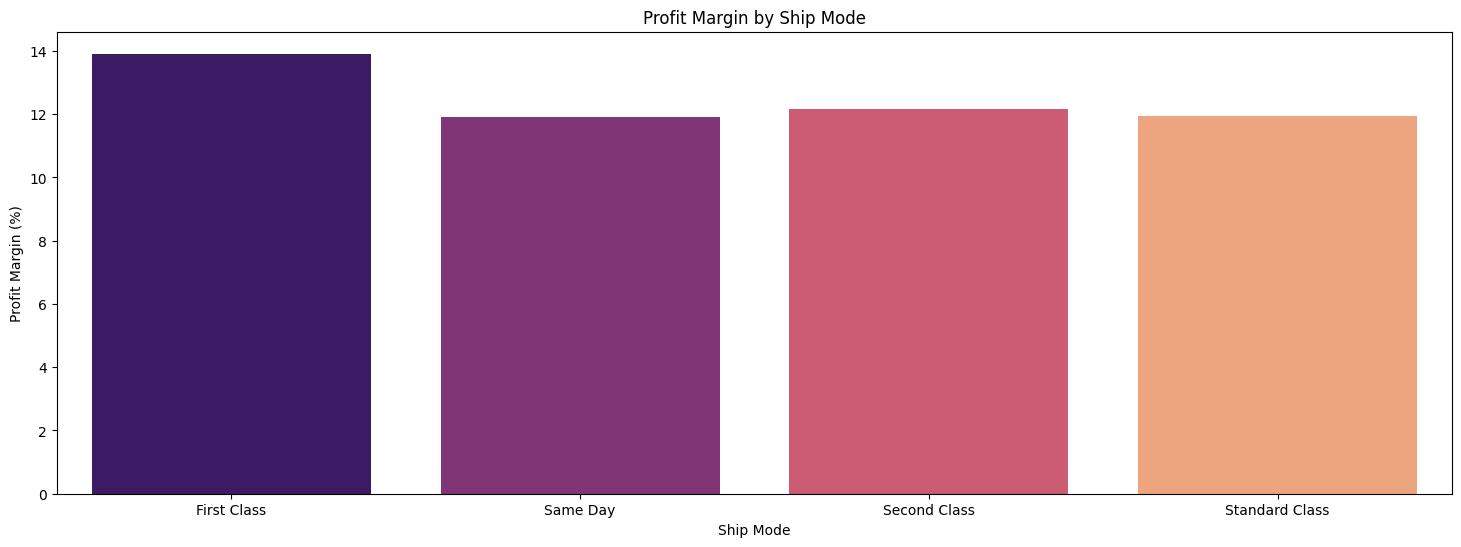

In [8]:
#Calculate profit margin and add to DataFrame
ship_mode_analysis['Profit Margin'] = (ship_mode_analysis['Profit'] / ship_mode_analysis['Sales']) * 100

#Visualize profit margin
plt.figure(figsize=(18, 6))
sns.barplot(x='Ship Mode', y='Profit Margin', data=ship_mode_analysis, palette='magma')
plt.title('Profit Margin by Ship Mode')
plt.ylabel('Profit Margin (%)')
plt.show()

El primer gráfico muestra las ventas y ganancias en varios modos de envío, revelando que la Clase Estándar es la opción predominante, liderando significativamente tanto en ventas como en ganancias. Aunque la Primera Clase y la Segunda Clase muestran ventas respetables, sus contribuciones a las ganancias son comparativamente menores, y el envío el mismo día muestra el menor impacto. Esto sugiere una fuerte preferencia de los clientes por la Clase Estándar, probablemente debido a su equilibrio entre costo y velocidad de entrega, que también parece ser la más rentable para el minorista.

El análisis del margen de beneficio refina aún más nuestra comprensión, mostrando una distribución relativamente uniforme de los márgenes de beneficio entre los modos de envío, con Primera Clase ligeramente a la cabeza. Esta uniformidad sugiere que, si bien el volumen y el beneficio total de la Clase Estándar son mayores debido a su popularidad, la eficiencia o rentabilidad de cada modo en términos de margen es bastante consistente. La ligera ventaja de First Class en el margen de beneficio podría indicar una estrategia de precios premium que no disuade a su base de clientes.

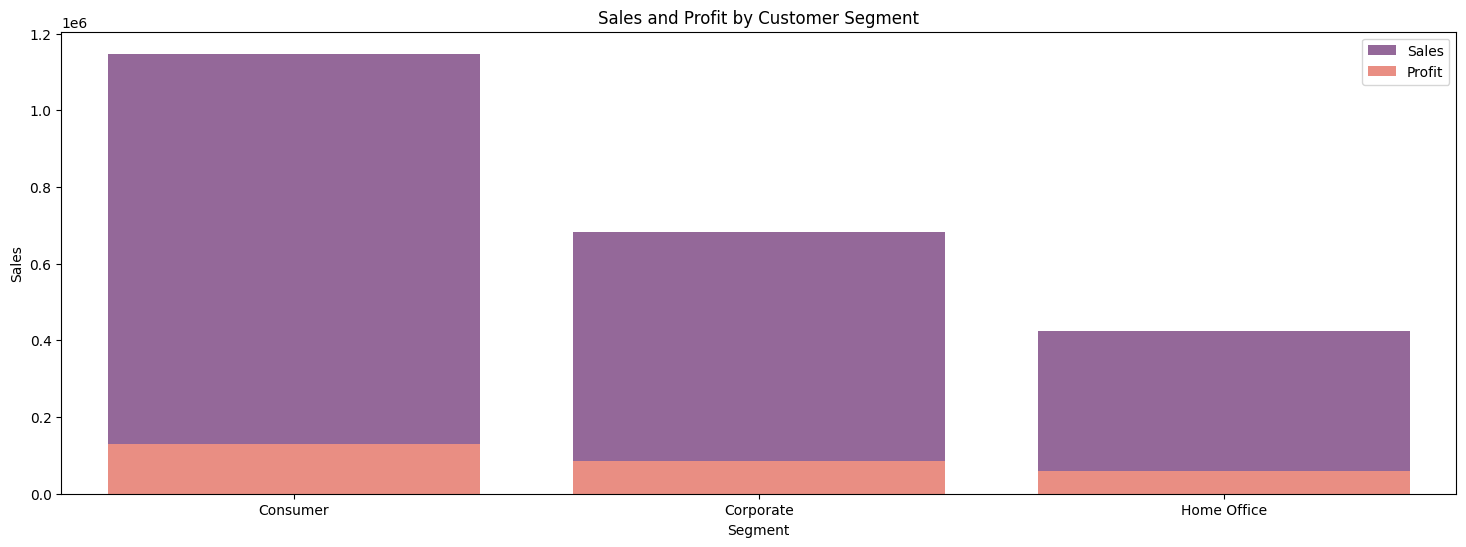

In [9]:
# Group sales and profit by segments
segment_analysis = df.groupby('Segment').agg({'Sales':'sum', 'Profit':'sum'}).reset_index()

# Visualize sales and profit with a bar chart
plt.figure(figsize=(18, 6))
sns.barplot(x='Segment', y='Sales', data=segment_analysis, color='#9B60A1', label='Sales')
sns.barplot(x='Segment', y='Profit', data=segment_analysis, color='salmon', label='Profit')
plt.title('Sales and Profit by Customer Segment')
plt.legend()
plt.show()

/var/folders/wz/hfsksc4d0h1gqgq5z6wld3vr0000gn/T/ipykernel_73429/2561305202.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Segment', y='Profit Margin', data=segment_analysis, palette='magma')


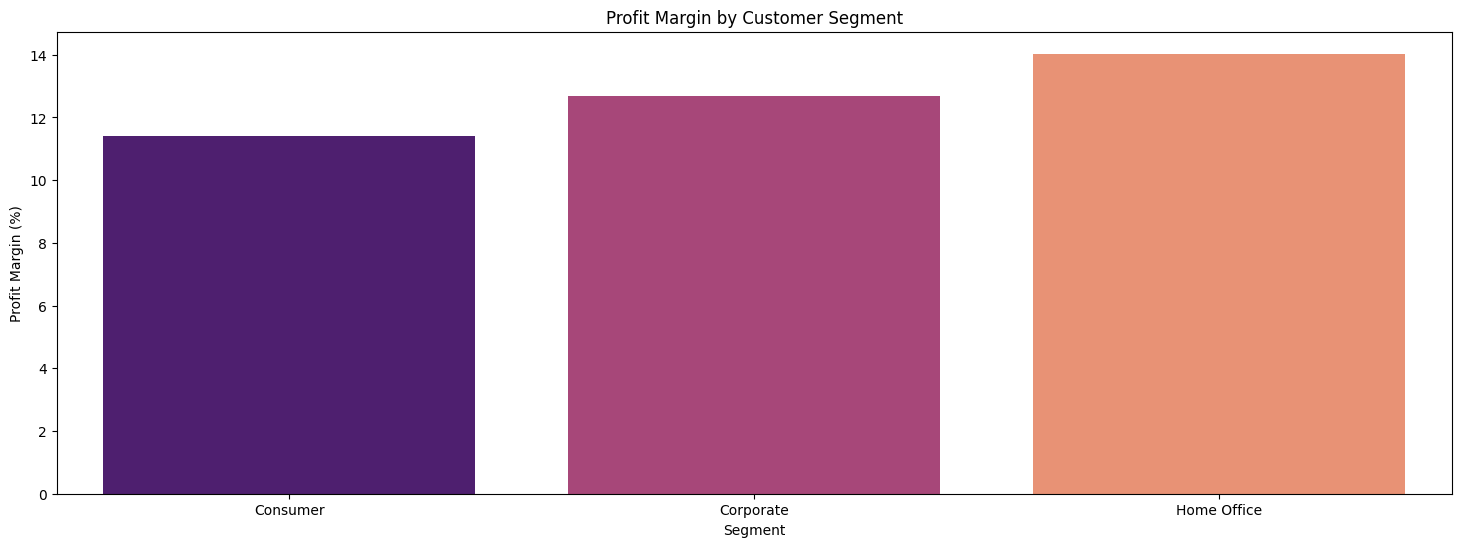

In [10]:
#Calculate profit margin and add to DataFrame
segment_analysis['Profit Margin'] = (segment_analysis['Profit'] / segment_analysis['Sales']) * 100

#Visualize profit margin
plt.figure(figsize=(18, 6))
sns.barplot(x='Segment', y='Profit Margin', data=segment_analysis, palette='magma')
plt.title('Profit Margin by Customer Segment')
plt.ylabel('Profit Margin (%)')
plt.show()

Los segmentos corporativo y de oficina en casa muestran contribuciones significativas pero a menor escala, lo que indica una rentabilidad variada de la base de clientes.

Los márgenes de beneficio son relativamente consistentes en todos los segmentos, con Home Office ligeramente más altos, lo que sugiere una rentabilidad eficiente a pesar del menor volumen de ventas.

In [ ]:
def visualize_sales_profit(df, group_by='State', group_column=None, top=True):
    # Aggregate data
    if group_column is None:
        group_column = group_by
    
    agg_data = df.groupby(group_column).agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()
    
    if top:
        agg_data = agg_data.sort_values(by='Sales', ascending=False).head(10)
        title_top_bottom = 'Top'
    else:
        agg_data = agg_data.sort_values(by='Sales', ascending=True).head(10)
        title_top_bottom = 'Bottom'
    
    # Visualize
    g = sns.catplot(
        data=agg_data.melt(id_vars=[group_column], value_vars=['Sales', 'Profit']),
        kind='bar',
        x='value',
        y=group_column,
        hue='variable',
        palette=['#9B60A1', 'salmon'],
        height=10, aspect=1,
        legend=False
    )
    g.despine(left=True)
    g.set_axis_labels("Total Amount ($)", group_by)
    g.ax.legend(title="Metrics")
    g.fig.suptitle(f'{title_top_bottom} 10 by Total Sales and Their Total Profit, Grouped by {group_column}', fontsize=16)
    g.fig.set_facecolor((173/255, 216/255, 230/255, 0.5))
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()

In [ ]:
def visualize_profit_margin(df, group_by='State', group_column=None, top=True):
    # Aggregate data
    if group_column is None:
        group_column = group_by
    
    agg_data = df.groupby(group_column).agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()
    
    # Calculate profit margin
    agg_data['Profit Margin'] = (agg_data['Profit'] / agg_data['Sales']) * 100
    
    if top:
        agg_data = agg_data.sort_values(by='Profit Margin', ascending=False).head(10)
        title_top_bottom = 'Top'
    else:
        agg_data = agg_data.sort_values(by='Profit Margin', ascending=True).head(10)
        title_top_bottom = 'Bottom'
    
    # Visualize
    plt.figure(figsize=(18, 6))
    sns.barplot(x='Profit Margin', y=group_column, data=agg_data, palette='magma')
    plt.title(f'{title_top_bottom} 10 by Profit Margin, Grouped by {group_column}')
    plt.xlabel('Profit Margin (%)')
    plt.ylabel(group_column)
    plt.show()

In [ ]:
visualize_sales_profit(df, group_by='Category', top=True)


In [ ]:
visualize_profit_margin(df, group_by='Category', top=True)

Ventas y ganancias por categoría: la tecnología lidera las ganancias, a pesar de volúmenes de ventas similares con muebles, lo que indica una mayor rentabilidad por artículo vendido o un precio más alto en esta categoría. Cuando se trata de suministros de oficina, si bien tienen las ventas más altas, muestran ganancias comparativamente más bajas, lo que sugiere un modelo de negocio impulsado por el volumen pero con márgenes más bajos.

Margen de beneficio por categoría: la tecnología se destaca con el margen de beneficio más alto, lo que refuerza su posición como la categoría más lucrativa, probablemente debido a los precios superiores y la demanda del producto. Cuando se trata de muebles, a pesar de las importantes ventas, tiene el margen de beneficio más bajo, lo que indica áreas potenciales para la reducción de costos o ajustes de precios para mejorar la rentabilidad. Los suministros de oficina, por otro lado, mantienen un margen de beneficio constante, lo que respalda un flujo de ingresos consistente, aunque menos rentable, en comparación con la tecnología.

In [ ]:
visualize_sales_profit(df, group_by='Sub-Category', top=True)
visualize_sales_profit(df, group_by='Sub-Category', top=False)
visualize_profit_margin(df, group_by='Sub-Category', top=True)
visualize_profit_margin(df, group_by='Sub-Category', top=False)

Altas ventas con rentabilidad variada: productos como teléfonos y sillas demuestran altos volúmenes de ventas, lo que sugiere una fuerte demanda de los consumidores. Sin embargo, no todas las categorías de altas ventas exhiben ganancias igualmente altas, lo que indica que el volumen de ventas no se correlaciona directamente con la rentabilidad. Por ejemplo, las tablas muestran ventas significativas, pero su contribución a las ganancias es menos impresionante, lo que sugiere posibles problemas con las estrategias de precios, la gestión de costos o ambos.

Nichos de alto margen: el análisis descubre áreas de nicho como fotocopiadoras y accesorios que, aunque no encabezan las listas de ventas, cuentan con altos márgenes de beneficio. Esto sugiere que centrarse en estas áreas podría generar retornos sustanciales con volúmenes de ventas relativamente más bajos. Estos nichos representan oportunidades estratégicas para el marketing dirigido y la gestión de inventario para maximizar los márgenes de beneficio.

Desafíos en categorías de bajo margen: Subcategorías como Mesas y Librerías emergen como áreas con márgenes de ganancia más bajos, algunas incluso sumergiéndose en territorio negativo. Esto resalta la necesidad de una revisión estratégica y ajustes operativos para abordar los altos costos, los precios competitivos u otros factores del mercado que impactan negativamente la rentabilidad.

In [ ]:
visualize_sales_profit(df, group_by='State', top=True)
visualize_sales_profit(df, group_by='State', top=False)
visualize_profit_margin(df, group_by='State', top=True)
visualize_profit_margin(df, group_by='State', top=False)

Los países con mejor desempeño, como California y Nueva York, generan ventas significativas, lo que indica una fuerte demanda del mercado.

Los países con peor desempeño, como Dakota del Norte y Wyoming, pueden requerir un enfoque estratégico para liberar su potencial.

El análisis del margen de beneficio muestra regiones como Delaware con alta eficiencia, lo que sugiere áreas para la optimización operativa.

In [ ]:
visualize_sales_profit(df, group_by='City', top=True)
visualize_sales_profit(df, group_by='City', top=False)
visualize_profit_margin(df, group_by='City', top=True)
visualize_profit_margin(df, group_by='City', top=False)

Las principales ciudades impulsan las ventas: las principales ciudades como Nueva York y Los Ángeles lideran tanto en ventas como en ganancias, destacando las áreas urbanas como mercados clave para el éxito del comercio minorista.

Variabilidad en la rentabilidad: a pesar de las altas ventas, las contribuciones a las ganancias varían significativamente entre ciudades, lo que apunta a diferencias en la eficiencia operativa, las estructuras de costos o las preferencias de los consumidores.

Altos márgenes de beneficio en ciudades específicas: Ciudades como Atlantic City y New Brunswick muestran altos márgenes de beneficio, lo que sugiere nichos de mercado o estrategias efectivas de gestión de costos que maximizan la rentabilidad.

Desafíos en las ciudades más pequeñas: Las empresas con peor desempeño por margen de ganancias, incluidas Abilene y Mesquite, indican áreas donde las operaciones minoristas pueden ser menos eficientes o enfrentar desafíos del mercado.

### Preparando datos para la modelación

In [11]:
data = df.copy()

In [12]:
cols = ["Order ID", 'Ship Date','Ship Mode','Segment', "Region", "Sub-Category", 'Customer ID', 'Customer Name',  'Country', 'City', 'State', 'Postal Code',  'Product ID',   'Product Name',]
data.drop(cols, axis=1, inplace=True)
data = data.sort_values('Order Date')
data.isnull().sum()

Order Date    0
Category      0
Sales         0
Quantity      0
Discount      0
Profit        0
dtype: int64

In [13]:
data.head()

,Order Date,Category,Sales,Quantity,Discount,Profit
8109,01/01/2018,Office Supplies,6.470,5,0.8,-9.7050
8111,01/01/2018,Office Supplies,15.224,2,0.8,-38.8212
4028,01/01/2018,Furniture,474.430,11,0.0,199.2606
850,01/01/2018,Furniture,48.896,4,0.2,8.5568
8110,01/01/2018,Office Supplies,13.748,14,0.8,-22.6842


In [14]:
data['Order Date'] = pd.to_datetime(data['Order Date'] , format='%d/%m/%Y' )

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Crear una instancia de LabelEncoder
label_encoder = LabelEncoder()

# Iterar sobre cada columna del DataFrame
for column in df.columns:
    # Verificar si la columna es de tipo 'object' (categórica)
    if df[column].dtype == 'object':
        # Codificar los valores de la columna usando LabelEncoder
        df[column] = label_encoder.fit_transform(df[column])

In [15]:
data = data.rename(columns= {"Order Date": "ds", "Category":"unique_id", "Sales":"y"})

In [16]:
data = data[['ds', 'unique_id', 'y', 'Quantity', 'Discount', 'Profit']].groupby(['ds', 'unique_id']).sum().reset_index()
data.head()

,ds,unique_id,y,Quantity,Discount,Profit
0,2015-01-03,Office Supplies,16.448,2,0.2,5.5512
1,2015-01-04,Office Supplies,288.060,8,1.2,-65.9901
2,2015-01-05,Office Supplies,19.536,3,0.2,4.8840
3,2015-01-06,Furniture,2573.820,9,0.0,746.4078
4,2015-01-06,Office Supplies,685.340,15,0.0,293.8612


In [17]:
sipi =fill_gaps(
    data,
    freq='D')

In [18]:
sipi

,unique_id,ds,y,Quantity,Discount,Profit
0,Furniture,2015-01-06,2573.820,9.0,0.0,746.4078
1,Furniture,2015-01-07,76.728,3.0,0.6,-53.7096
2,Furniture,2015-01-08,NaN,NaN,NaN,NaN
3,Furniture,2015-01-09,NaN,NaN,NaN,NaN
4,Furniture,2015-01-10,51.940,1.0,0.0,21.2954
...,...,...,...,...,...,...
4363,Technology,2018-12-26,NaN,NaN,NaN,NaN
4364,Technology,2018-12-27,164.388,2.0,0.4,-35.6174
4365,Technology,2018-12-28,14.850,3.0,0.0,4.0095
4366,Technology,2018-12-29,302.376,3.0,0.2,22.6782


In [19]:
sipi = sipi.interpolate(method='linear',limit_direction='both')

/var/folders/wz/hfsksc4d0h1gqgq5z6wld3vr0000gn/T/ipykernel_73429/690952972.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  sipi = sipi.interpolate(method='linear',limit_direction='both')


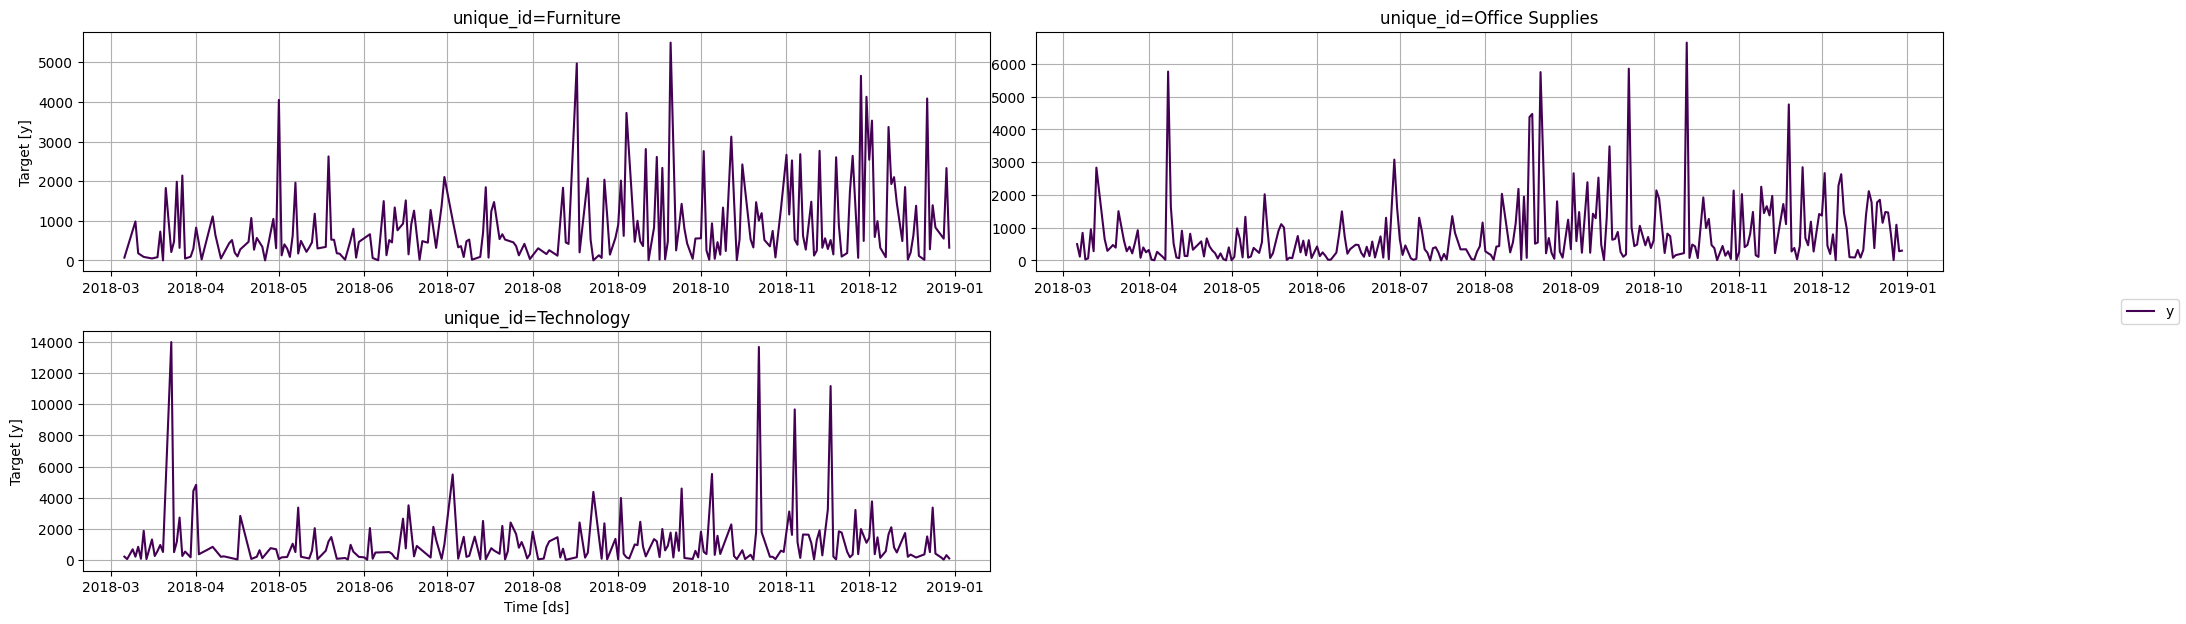

In [20]:
plot_series(sipi, max_insample_length= 300)

# **División de datos**

Vamos a dividir los datos en:

1. Datos de entrenamiento
2. Datos de prueba



In [ ]:
sipi[sipi["unique_id"] == "Office Supplies"].tail(31)

In [21]:
train = sipi[sipi.ds<='2018-11-30'] 
test = sipi[(sipi['ds'] > '2018-11-30')]


train.shape, test.shape

/var/folders/wz/hfsksc4d0h1gqgq5z6wld3vr0000gn/T/ipykernel_73429/808466920.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop("y",axis=1, inplace=True)


((4278, 6), (90, 5))

In [25]:
train

,unique_id,ds,y,Quantity,Discount,Profit
0,Furniture,2015-01-06,2573.820000,9.000000,0.0,746.407800
1,Furniture,2015-01-07,76.728000,3.000000,0.6,-53.709600
2,Furniture,2015-01-08,68.465333,2.333333,0.4,-28.707933
3,Furniture,2015-01-09,60.202667,1.666667,0.2,-3.706267
4,Furniture,2015-01-10,51.940000,1.000000,0.0,21.295400
...,...,...,...,...,...,...
4333,Technology,2018-11-26,3208.682000,21.000000,0.4,824.666900
4334,Technology,2018-11-27,367.458000,21.000000,0.2,121.629100
4335,Technology,2018-11-28,1979.890000,11.000000,0.0,494.972500
4336,Technology,2018-11-29,1538.939000,11.500000,0.3,369.292550


In [26]:
test

,unique_id,ds,Quantity,Discount,Profit
1425,Furniture,2018-12-01,38.0,1.00,399.4740
1426,Furniture,2018-12-02,34.0,1.90,-87.3116
1427,Furniture,2018-12-03,13.0,1.20,89.4736
1428,Furniture,2018-12-04,29.0,1.00,61.8547
1429,Furniture,2018-12-05,12.0,0.00,75.1530
...,...,...,...,...,...
4363,Technology,2018-12-26,8.0,0.55,18.0500
4364,Technology,2018-12-27,2.0,0.40,-35.6174
4365,Technology,2018-12-28,3.0,0.00,4.0095
4366,Technology,2018-12-29,3.0,0.20,22.6782


# Construimos el modelo

In [22]:
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA
from statsforecast.models import SeasonalNaive

/Users/user/Documents/miniconda3/envs/myenv/lib/python3.10/site-packages/statsforecast/core.py:26: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm
/Users/user/Documents/miniconda3/envs/myenv/lib/python3.10/site-packages/statsforecast/utils.py:237: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  "ds": pd.date_range(start="1949-01-01", periods=len(AirPassengers), freq="M"),


In [23]:
season_length = 7 

# We call the model that we are going to use
models = [AutoARIMA(season_length=season_length),
          SeasonalNaive(season_length=season_length),]

In [24]:
# Instantiate StatsForecast class as sf
sf = StatsForecast(df = train,
                   models=models,
                   freq='D', 
                   fallback_model = SeasonalNaive(season_length=season_length),
                   n_jobs=-1)

/Users/user/Documents/miniconda3/envs/myenv/lib/python3.10/site-packages/statsforecast/core.py:399: FutureWarning: The `df` argument of the StatsForecast constructor as well as reusing stored dfs from other methods is deprecated and will raise an error in a future version. Please provide the `df` argument to the corresponding method instead, e.g. fit/forecast.
  warnings.warn(


## Entrenamos el modelo

In [27]:
from statsforecast.utils import ConformalIntervals

intervals = ConformalIntervals(h = 30, n_windows = 3)

# fit the models
sf.fit( prediction_intervals=intervals)

/Users/user/Documents/miniconda3/envs/myenv/lib/python3.10/site-packages/statsforecast/core.py:399: FutureWarning: The `df` argument of the StatsForecast constructor as well as reusing stored dfs from other methods is deprecated and will raise an error in a future version. Please provide the `df` argument to the corresponding method instead, e.g. fit/forecast.
  warnings.warn(
/Users/user/Documents/miniconda3/envs/myenv/lib/python3.10/site-packages/statsforecast/utils.py:237: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  "ds": pd.date_range(start="1949-01-01", periods=len(AirPassengers), freq="M"),
/Users/user/Documents/miniconda3/envs/myenv/lib/python3.10/site-packages/statsforecast/utils.py:237: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  "ds": pd.date_range(start="1949-01-01", periods=len(AirPassengers), freq="M"),
/Users/user/Documents/miniconda3/envs/myenv/lib/python3.10

StatsForecast(models=[AutoARIMA,SeasonalNaive])

## Forecasting

In [28]:
# Prediction
Y_hat_exo = sf.forecast(h = 30, level=[80, 95])

Y_hat_exo

/Users/user/Documents/miniconda3/envs/myenv/lib/python3.10/site-packages/statsforecast/utils.py:237: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  "ds": pd.date_range(start="1949-01-01", periods=len(AirPassengers), freq="M"),
/Users/user/Documents/miniconda3/envs/myenv/lib/python3.10/site-packages/statsforecast/utils.py:237: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  "ds": pd.date_range(start="1949-01-01", periods=len(AirPassengers), freq="M"),
/Users/user/Documents/miniconda3/envs/myenv/lib/python3.10/site-packages/statsforecast/utils.py:237: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  "ds": pd.date_range(start="1949-01-01", periods=len(AirPassengers), freq="M"),
Forecast: 100%|██████████| 1/1 [00:39<00:00, 39.68s/it]
/Users/user/Documents/miniconda3/envs/myenv/lib/python3.10/site-packages/statsforecast/core.py:417: F

,ds,AutoARIMA,AutoARIMA-lo-95,AutoARIMA-lo-80,AutoARIMA-hi-80,AutoARIMA-hi-95,SeasonalNaive,SeasonalNaive-lo-95,SeasonalNaive-lo-80,SeasonalNaive-hi-80,SeasonalNaive-hi-95
unique_id,,,,,,,,,,,
Furniture,2018-12-01,4454.656250,2973.676025,3364.143066,5545.169922,5935.636719,1734.027954,-459.993927,-356.582275,3824.638184,3928.049805
Furniture,2018-12-02,3504.930664,3130.245605,3163.405518,3846.455811,3879.615723,2639.309082,1298.991943,1529.367676,3749.250488,3979.625977
Furniture,2018-12-03,1485.959473,-84.003990,492.015228,2479.903564,3055.922852,1375.599976,-1108.704102,-805.920471,3557.120605,3859.904053
Furniture,2018-12-04,2816.613037,2155.927734,2278.739258,3354.486572,3477.298096,65.779999,-2225.449219,-1626.544922,1758.104980,2357.009277
Furniture,2018-12-05,1036.330566,553.366272,631.569641,1441.091553,1519.294922,4659.140137,3548.681152,3805.280273,5513.000000,5769.598633
...,...,...,...,...,...,...,...,...,...,...,...
Technology,2018-12-26,1084.698242,48.397255,340.453735,1828.942871,2120.999268,1979.890015,-651.622131,118.303711,3841.476318,4611.401855
Technology,2018-12-27,493.561401,-686.102783,-428.738525,1415.861328,1673.225586,1538.938965,377.952759,779.765991,2298.111816,2699.925049
Technology,2018-12-28,188.469482,-408.374939,-391.511810,768.450806,785.313904,1097.988037,-388.875244,-382.128967,2578.104980,2584.851318


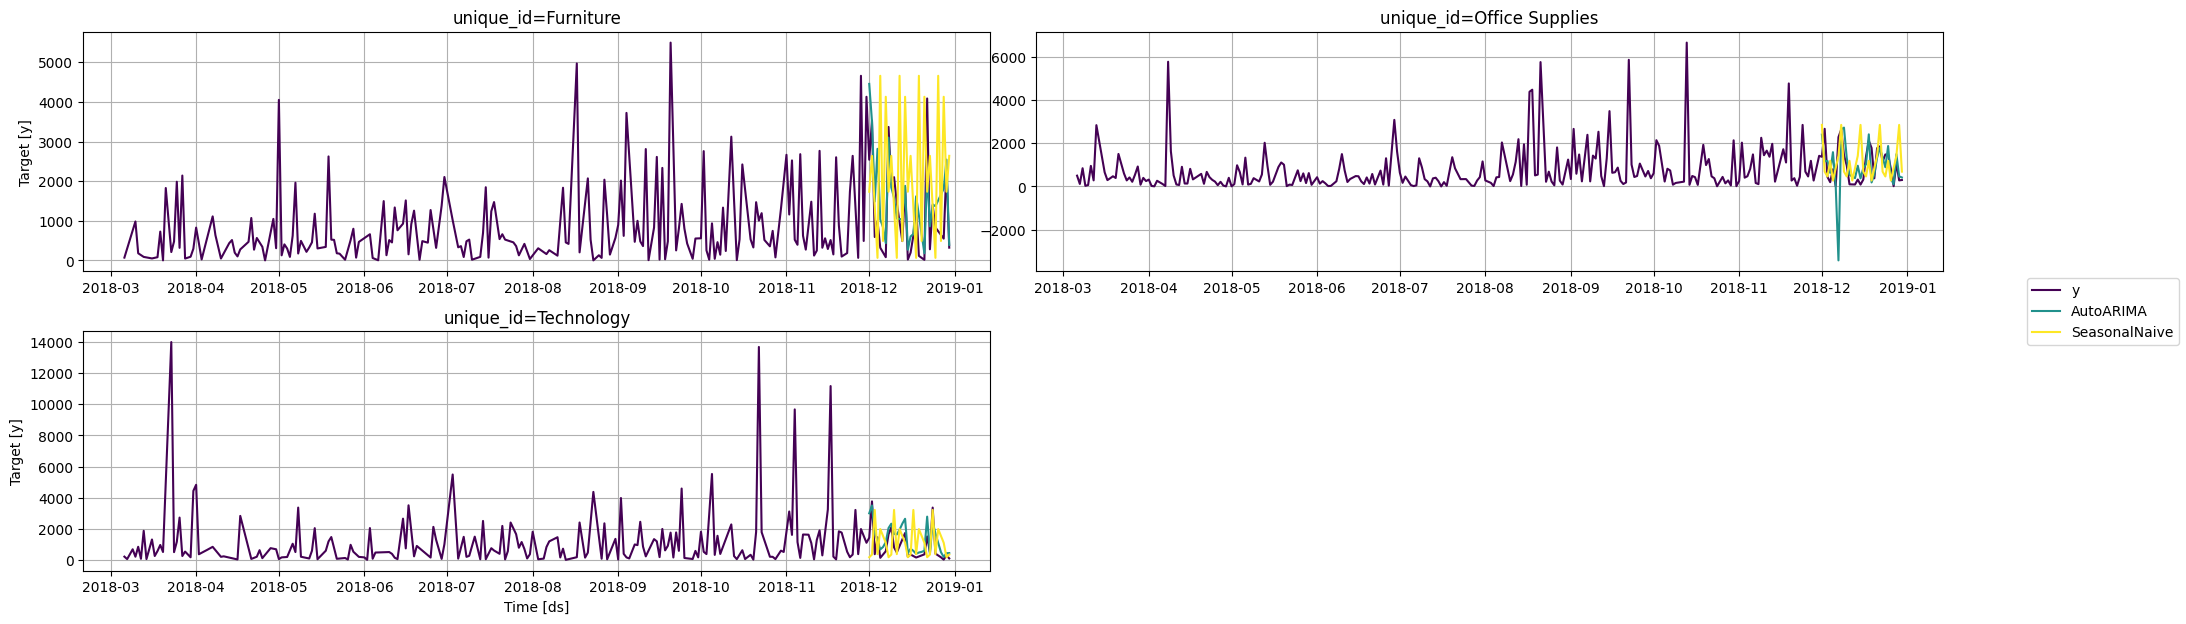

In [29]:
plot_series(sipi, Y_hat_exo.reset_index(), max_insample_length= 300)

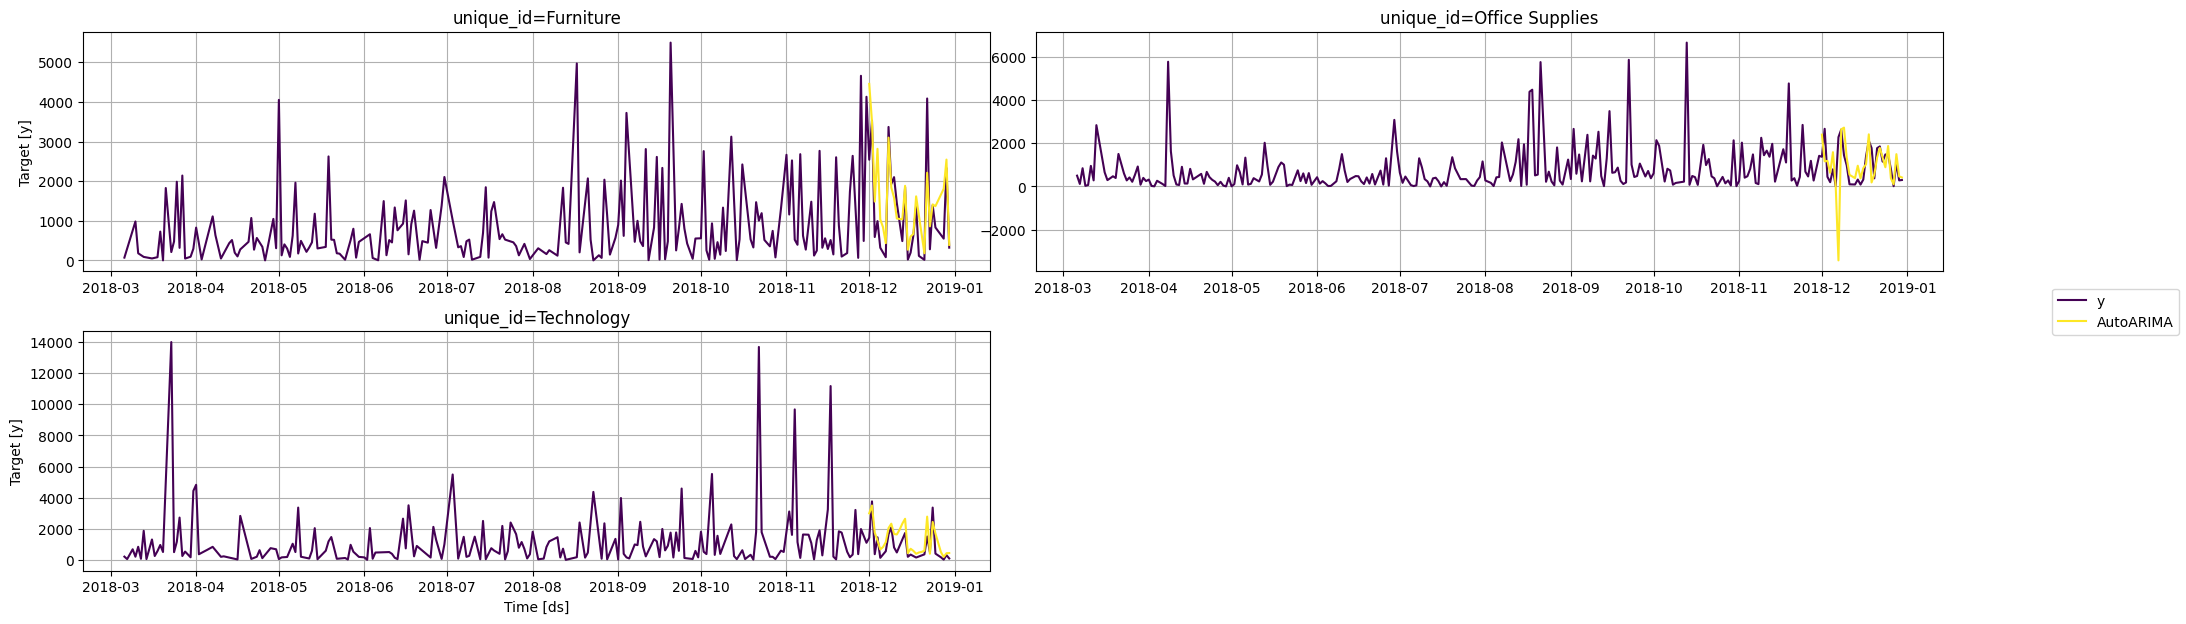

In [30]:
plot_series(sipi, Y_hat_exo.reset_index(), max_insample_length= 300, models= ["AutoARIMA"])

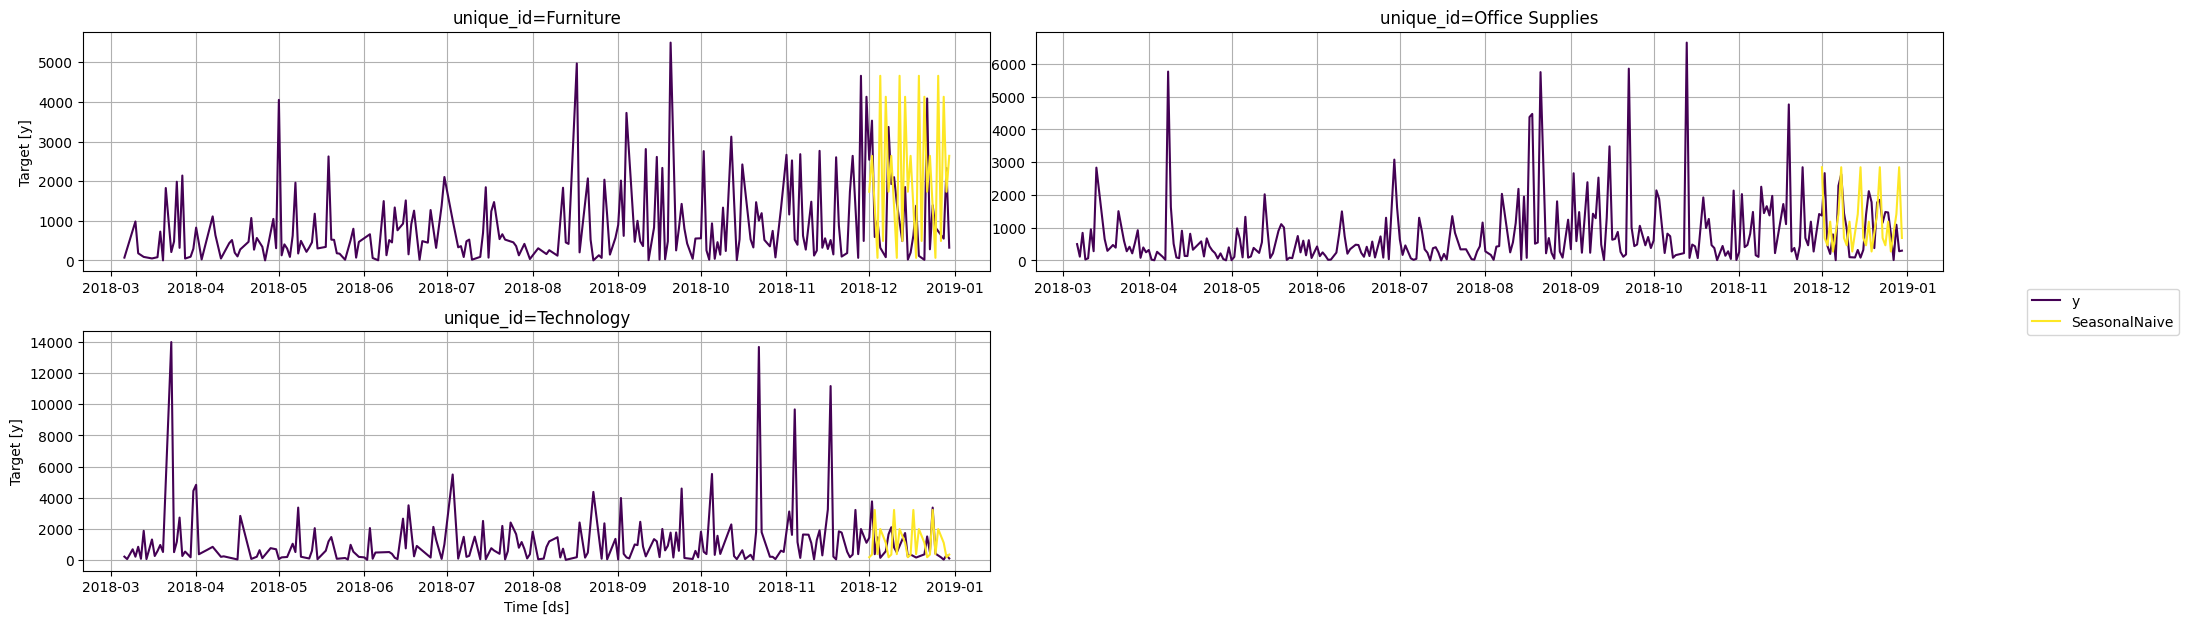

In [31]:
plot_series(sipi, Y_hat_exo.reset_index(), max_insample_length= 300, models= ["SeasonalNaive"])

## Evaluamos el Modelo con `Cross Validation`

In [33]:
cv_sf_exo = sf.cross_validation(df=train, n_windows=5)

/Users/user/Documents/miniconda3/envs/myenv/lib/python3.10/site-packages/statsforecast/utils.py:237: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  "ds": pd.date_range(start="1949-01-01", periods=len(AirPassengers), freq="M"),
/Users/user/Documents/miniconda3/envs/myenv/lib/python3.10/site-packages/statsforecast/utils.py:237: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  "ds": pd.date_range(start="1949-01-01", periods=len(AirPassengers), freq="M"),
/Users/user/Documents/miniconda3/envs/myenv/lib/python3.10/site-packages/statsforecast/utils.py:237: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  "ds": pd.date_range(start="1949-01-01", periods=len(AirPassengers), freq="M"),
Cross Validation Time Series 1: 100%|██████████| 5/5 [00:49<00:00,  9.89s/it]
/Users/user/Documents/miniconda3/envs/myenv/lib/python3.10/site-packages/statsf

In [34]:
cv_sf_exo

,ds,cutoff,y,AutoARIMA,SeasonalNaive
unique_id,,,,,
Furniture,2018-10-28,2018-10-27,77.952003,330.184845,1470.238037
Furniture,2018-10-29,2018-10-27,689.854980,1280.213257,1005.341003
Furniture,2018-10-30,2018-10-27,1301.758057,2271.101074,1193.400024
Furniture,2018-10-31,2018-10-27,1983.688965,1553.981567,517.405029
Furniture,2018-11-01,2018-10-27,2665.620117,897.673828,437.127502
...,...,...,...,...,...
Technology,2018-11-26,2018-10-31,3208.681885,2853.846191,320.528015
Technology,2018-11-27,2018-10-31,367.458008,1632.910156,590.880005
Technology,2018-11-28,2018-10-31,1979.890015,1377.424561,508.768005


In [35]:
from datasetsforecast.losses import mae, mape, mase, rmse, smape

def evaluate_cross_validation(df, metric):
    models = df.drop(columns=['ds', 'cutoff', 'y']).columns.tolist()
    evals = []
    for model in models:
        eval_ = df.groupby(['unique_id', 'cutoff']).apply(lambda x: metric(x['y'].values, x[model].values)).to_frame() # Calculate loss for every unique_id, model and cutoff.
        eval_.columns = [model]
        evals.append(eval_)
    evals = pd.concat(evals, axis=1)
    evals = evals.groupby(['unique_id']).mean(numeric_only=True) # Averages the error metrics for all cutoffs for every combination of model and unique_id
    evals['best_model'] = evals.idxmin(axis=1)
    return evals

- Métrica MAPE

In [36]:
evaluation_df_sf_mape = evaluate_cross_validation(cv_sf_exo, mape)
evaluation_df_sf_mape

/var/folders/wz/hfsksc4d0h1gqgq5z6wld3vr0000gn/T/ipykernel_73429/1973204876.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  eval_ = df.groupby(['unique_id', 'cutoff']).apply(lambda x: metric(x['y'].values, x[model].values)).to_frame() # Calculate loss for every unique_id, model and cutoff.
/var/folders/wz/hfsksc4d0h1gqgq5z6wld3vr0000gn/T/ipykernel_73429/1973204876.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence thi

,AutoARIMA,SeasonalNaive,best_model
unique_id,,,
Furniture,140.342286,165.220666,AutoARIMA
Office Supplies,103.991410,106.882665,AutoARIMA
Technology,165.295379,841.609507,AutoARIMA


- Métrica MAE

In [37]:
evaluation_df_sf_mae = evaluate_cross_validation(cv_sf_exo, mae)
evaluation_df_sf_mae

/var/folders/wz/hfsksc4d0h1gqgq5z6wld3vr0000gn/T/ipykernel_73429/1973204876.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  eval_ = df.groupby(['unique_id', 'cutoff']).apply(lambda x: metric(x['y'].values, x[model].values)).to_frame() # Calculate loss for every unique_id, model and cutoff.
/var/folders/wz/hfsksc4d0h1gqgq5z6wld3vr0000gn/T/ipykernel_73429/1973204876.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence thi

,AutoARIMA,SeasonalNaive,best_model
unique_id,,,
Furniture,627.652832,844.725220,AutoARIMA
Office Supplies,516.112244,874.612793,AutoARIMA
Technology,1075.073486,2355.412109,AutoARIMA


- Métrica RMSE

In [38]:
evaluation_df_sf_rmse = evaluate_cross_validation(cv_sf_exo, rmse)
evaluation_df_sf_rmse

/var/folders/wz/hfsksc4d0h1gqgq5z6wld3vr0000gn/T/ipykernel_73429/1973204876.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  eval_ = df.groupby(['unique_id', 'cutoff']).apply(lambda x: metric(x['y'].values, x[model].values)).to_frame() # Calculate loss for every unique_id, model and cutoff.
/var/folders/wz/hfsksc4d0h1gqgq5z6wld3vr0000gn/T/ipykernel_73429/1973204876.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence thi

,AutoARIMA,SeasonalNaive,best_model
unique_id,,,
Furniture,795.005249,1176.284424,AutoARIMA
Office Supplies,1025.317017,1296.046753,AutoARIMA
Technology,2407.515625,4091.849609,AutoARIMA


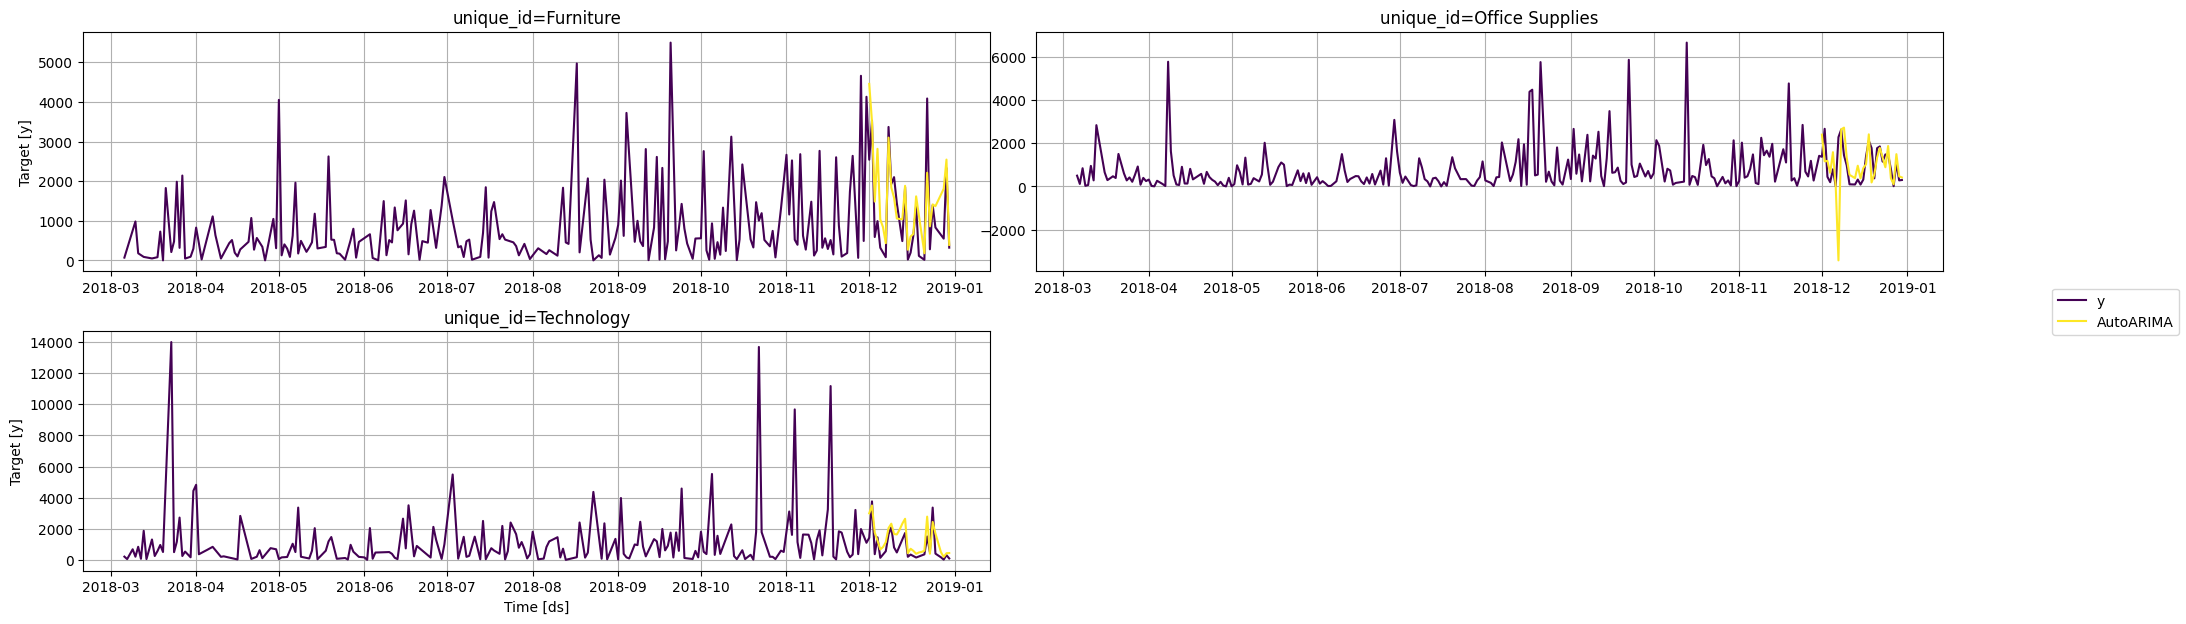

In [39]:
plot_series(sipi, Y_hat_exo.reset_index(), max_insample_length= 300, models= ["AutoARIMA"])

# Conclusión